# Help International Aid Assessment: Clustering

## Problem Statement

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. 

Through funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid.

The requirement is to categorise the countries using some socio-economic and health factors that determine the overall development of the country and then suggest the countries which the CEO needs to focus on the most.

## Steps Taken

* Task 1: **Exploratory Data Analysis**
    * Data Inspection
    * Use Data Visualization & Correlation Techniques to carry out Univariate & Bivariate Analysis
* Task 2: **Data Preparation** 
    * Outlier Analysis & Treatment
    * Scaling of Numeric Variables
* Task 3: **Clustering**
    * Hopkins Test
    * K Means Clustering
    * Hierarchical Clustering
    * Cluster Profiling

## Step 1: Exploratory Data Analysis

### Step 1.1: Data Inspection

In [406]:
#Import relevant packages to start off our analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [407]:
# Read dataset in and check the first few records of the data

df = pd.read_csv("Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [408]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [409]:
# Check dimensions of the data

df.shape

(167, 10)

In [410]:
# Check data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


We see that there are no fields with null values. This saves us from going through the process of null value treatment. We also see that except for the field 'country', all are numeric variables which makes KMeans & Hierarchical Clustering the appropriate algorithms for clustering.

Columns **exports**, **health** & **imports** will need to be converted from percentage to actual numbers since they are a percentage of GDP which will vary from country to country.

In [411]:
#Convert exports, health & imports to actual numbers

df.exports = (df.exports/100)*df.gdpp
df.health = (df.health/100)*df.gdpp
df.imports = (df.imports/100)*df.gdpp

In [412]:
# Check stats related to the different columns in the dataset

df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


We can see that most of the fields have quite a bit of variance. This can be explored further through univariate and biviarate analysis. Since all fields shown here will be used for clustering, none of them will need to be dropped.

### 1.2 Visualization & Correlation of Data

#### 1.2.1 Univariate Analysis

Let us start by looking at the trends in the data by plotting the spread of each of the numeric variables using histograms.

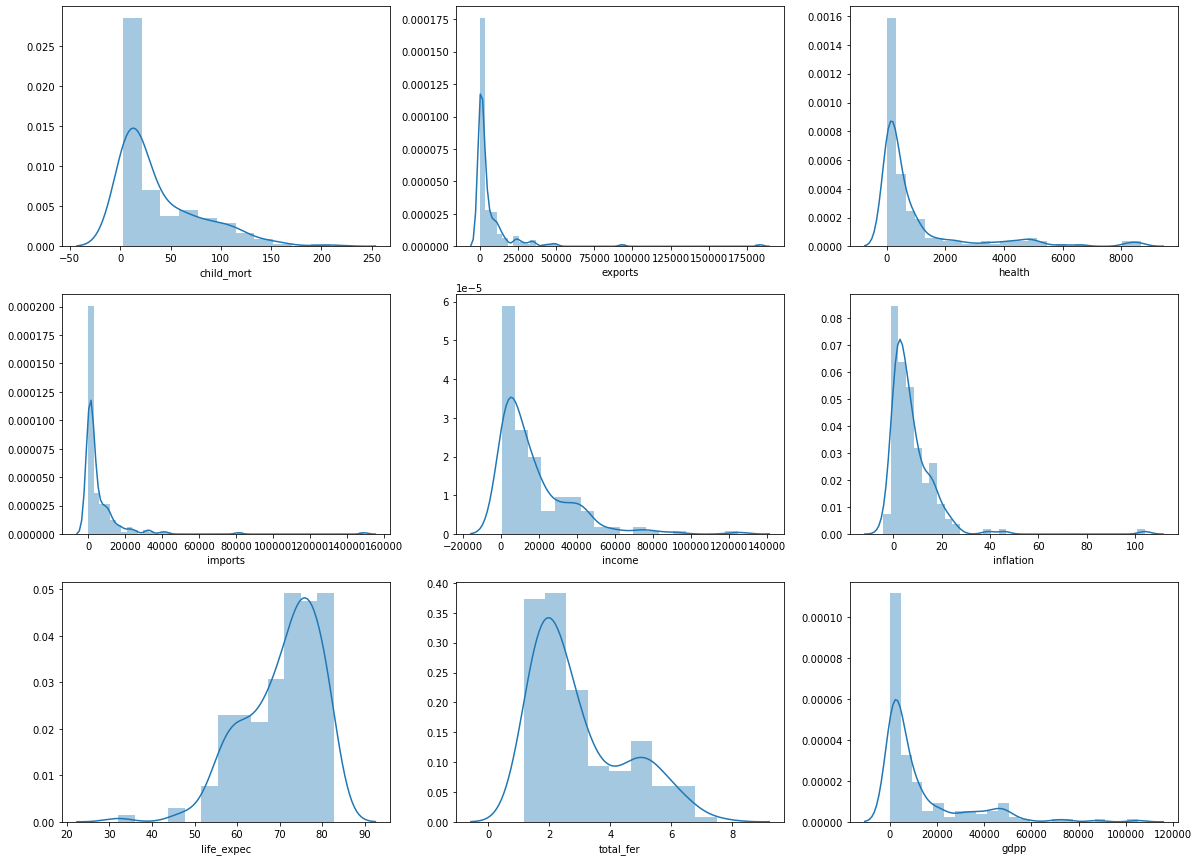

In [413]:
#Plot histograms for each of the numeric variables

variables = df.columns[1:]
variables
plt.figure(figsize = (20,15))
for i in enumerate(variables):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(df[i[1]])

We notice from the above that:-

* Variables related to child mortality, life expectancy, fertility rates (total_fer), income and GDP visibily show pockets of datapoints indicating clusters of countries in these pockets.

* In all of the graphs, a majority of the countries are clustering at acceptable ranges for each of the parameters indicating that the world at large is moving together in terms of progress. Our focus when it comes to prioritising Aid should therefore be at the tail ends (left or right depending on the parameter).

#### 1.2.2 Bivariate Analysis

Let us now use scatterplots to see how the features are correlated to each other.

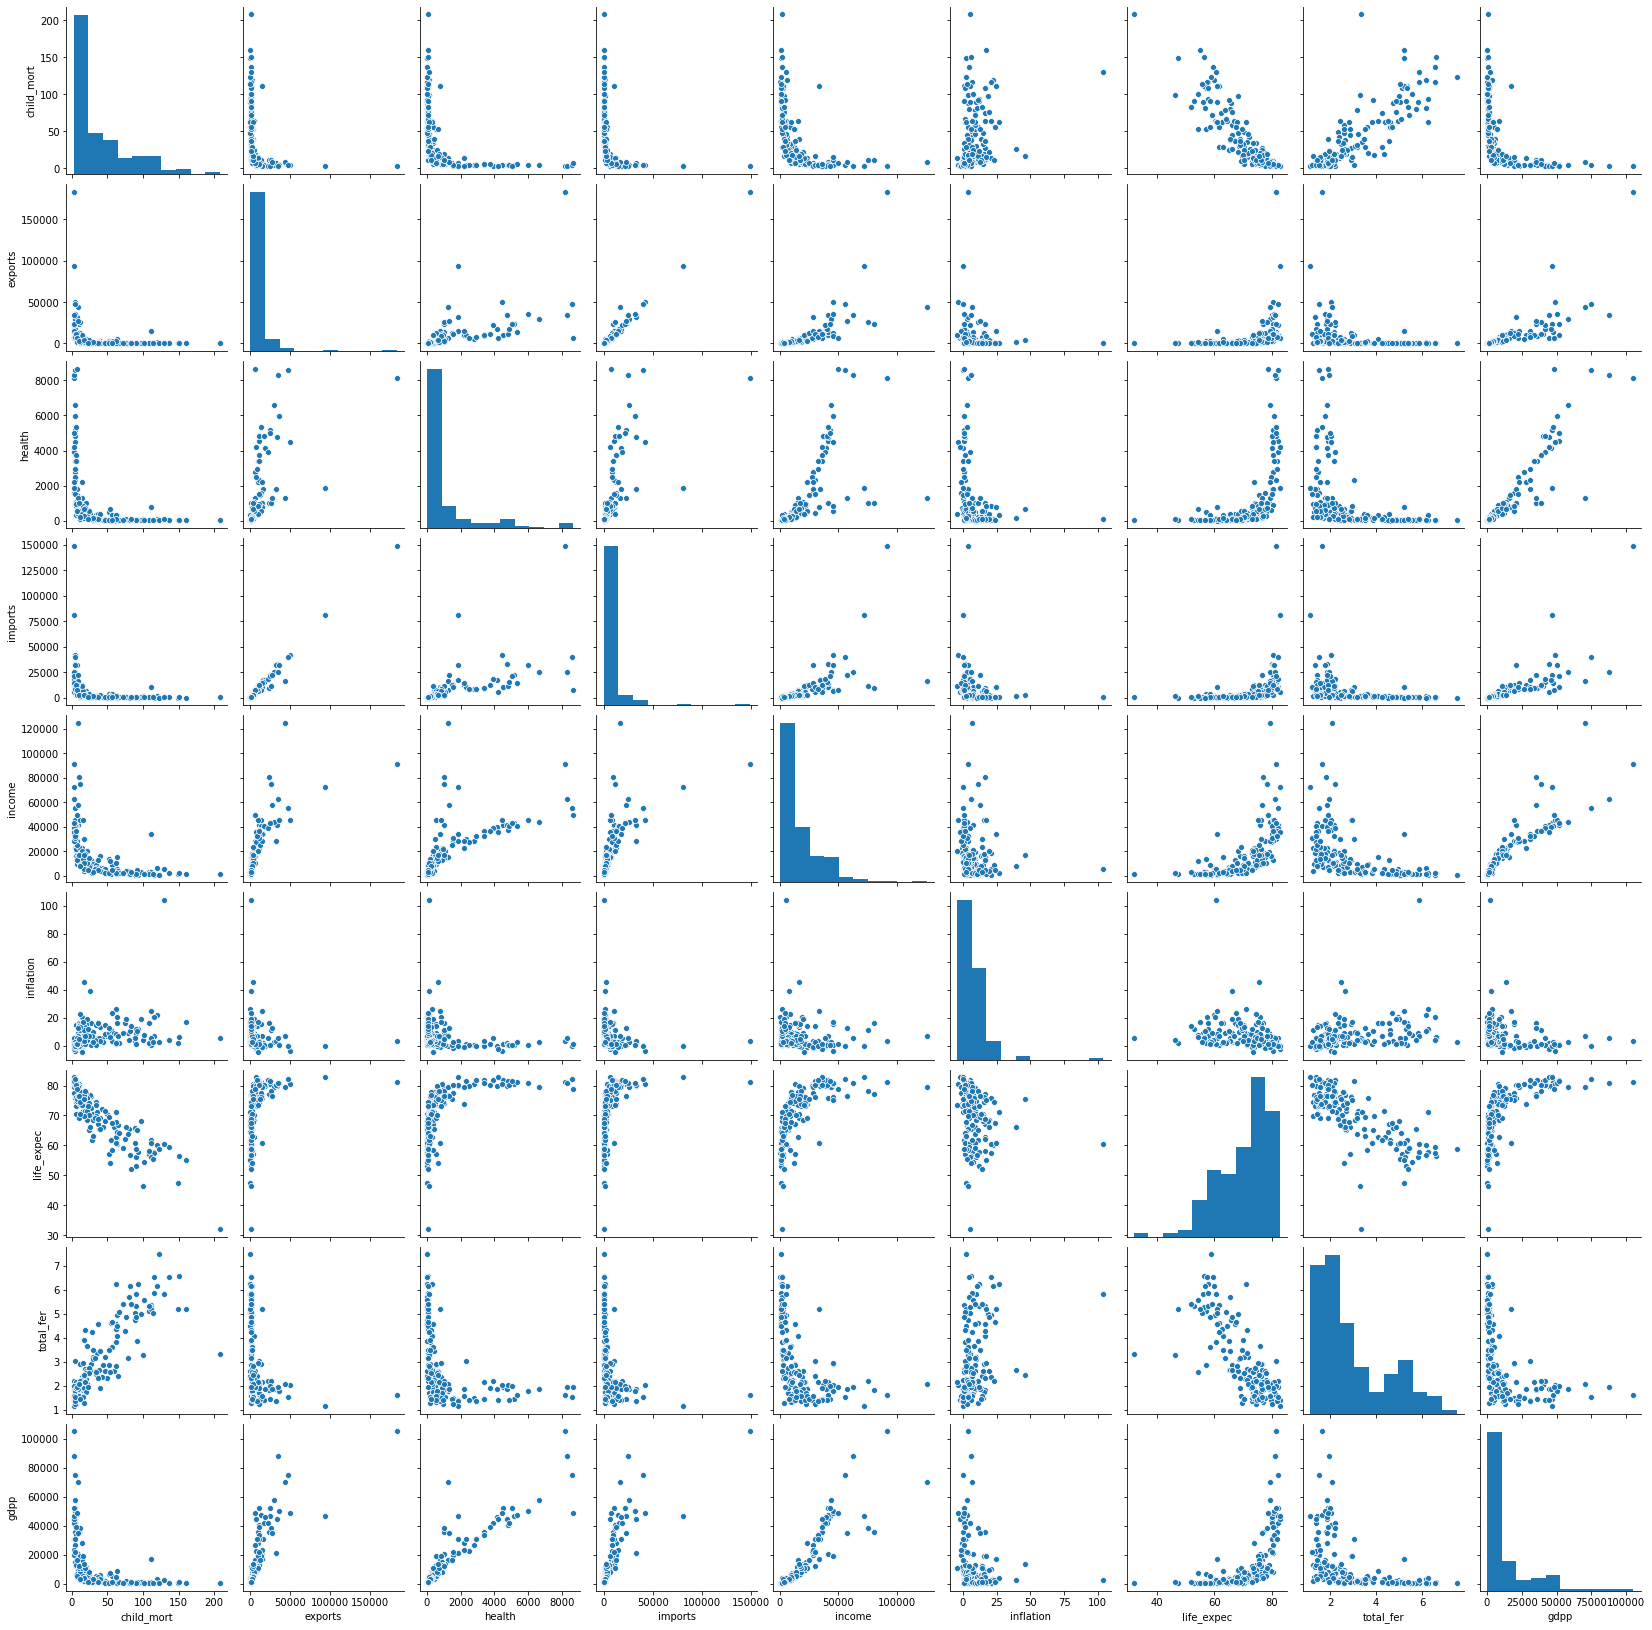

In [414]:
#Plot multiple scatterplots for all features using pairplot

sns.pairplot(df[variables])

From the above, we can observe that:-

* Child Mortality vs Life Expectancy have a strong negative correlation.
* GDP & Health have a strong positive correlation.
* Health & Income seem to have positive correlation.
* As Child Mortality increases, so does the number of children expected to be born to each woman (total_fer).
* As Life Expectancy increases, the number of children expected per woman decreases. 
* Imports vs Exports have a somewhat positive relationship.
* Incomes and GDP have a positive correlation.
* It is interesting that GDP - considered as one of the primary indicators worldwide for economic and human prosperity, does not have a linear relationship with child mortality or life expectancy. The graphs show that below a certain GDP, child mortality and life expectancy are abysmal for a lot of countries. Post threshold, both parameters then start to improve indicating that countries are unable to focus on them till they hit a substantial level of economic prosperity.

We will now look at the exact correlations between the different variables as well.

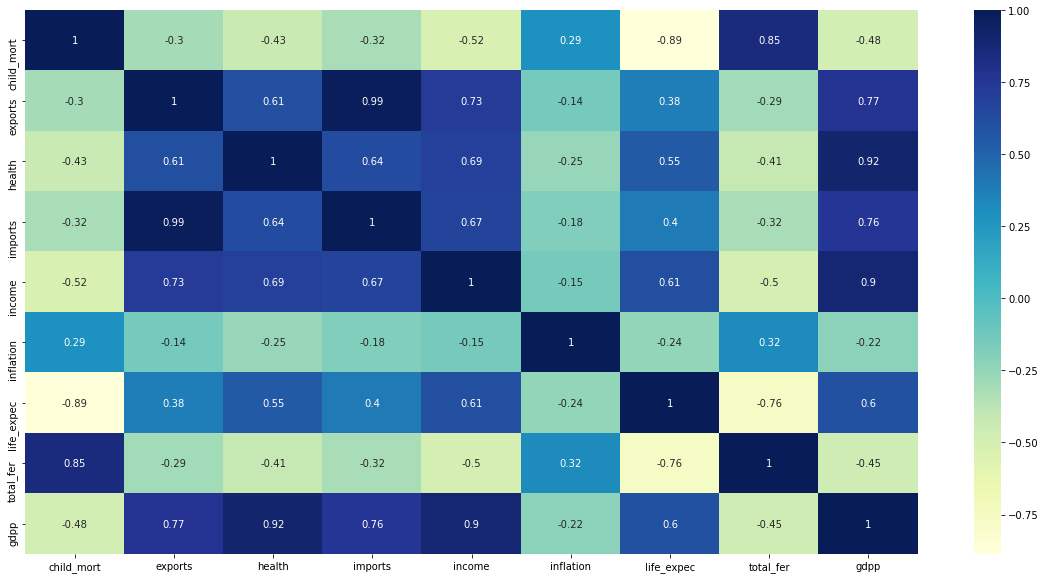

In [415]:
#Correlation heatmap

plt.figure(figsize = (20,10))
sns.heatmap(df[variables].corr(),cmap = 'YlGnBu',annot = True)

## Task 2: Data Preparation

### 2.1 Outlier Analysis & Treatment

We will now use boxplots to get a better understanding of the variables in terms of outliers.

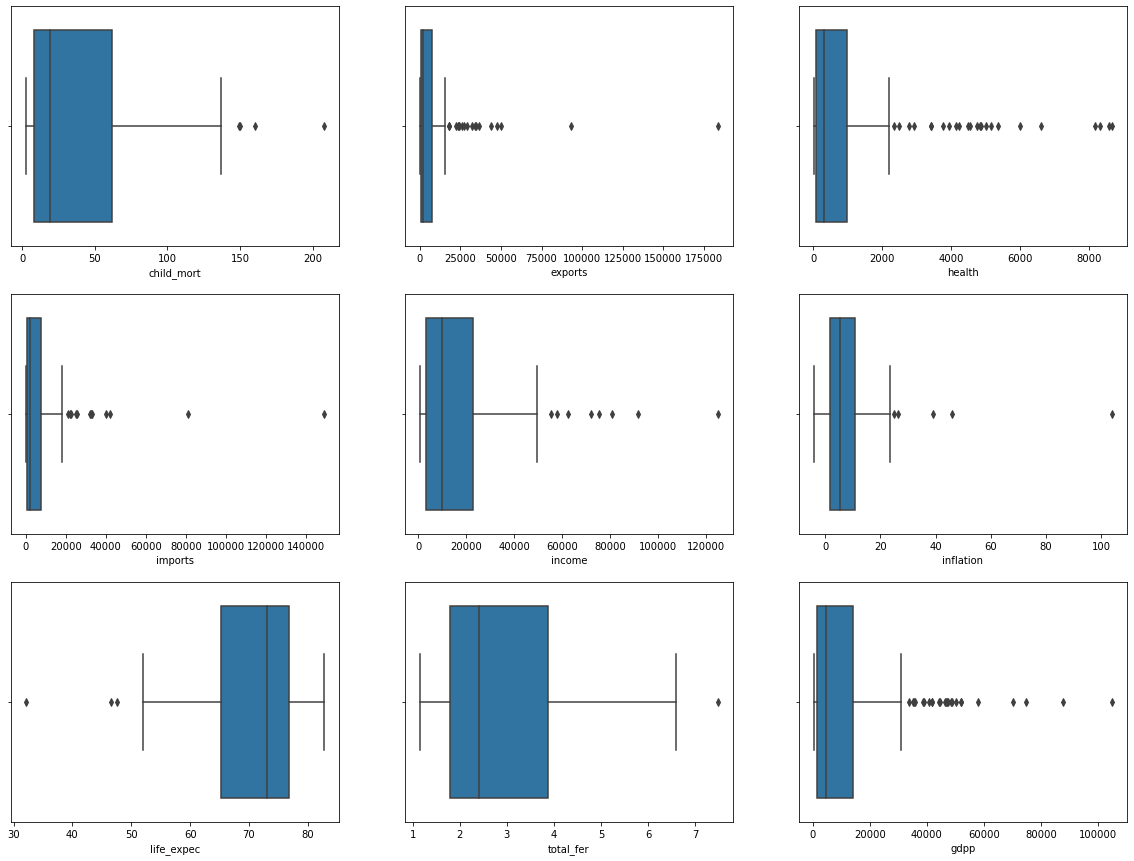

In [416]:
# Use For Loop to plot Boxplots for each variable

plt.figure(figsize = (20,15))
for i in enumerate(variables):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(df[i[1]])

We observe that:-
* While looking at variables individually, we can see that there are countries that are outliers with high child mortality, low life expectancy or high inflation. Some of these are countries that will likely require aid.

* We will need to do outlier treatment that is specific to some of these features.

In the next steps, we will carry out outlier treatment. When doing this, the following needs to be kept in mind:-

* Higher end outliers for Child Mortality should not be treated as this could result in exclusion of countries that actually require the aid. 

* Using the same logic and based on the boxplots visualized above:-
    * Higher end outliers for inflation should not be treated.
    * Lower end outliers for life expectancy should be left as is.
    * Higher end outliers for total fertility (total_fer) should be left as is.
    
* We will impute outliers by:-
    * Identifying outliers above a certain percentile (95 or 99 depending on the spread of the outliers of the variable) and assigning them the value of that percentile.
    * Identifying outliers below a certain percentile (5 or 1) and assigning them the value of that percentile.

In [417]:
#Outlier Treatment for exports

q4_exports = df.exports.quantile(0.95) #Find the 95th percentile of exports
df['exports'][df['exports'] > q4_exports] = q4_exports

C:\Users\arvin\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [418]:
#Outlier Treatment for health

q4_health = df.health.quantile(0.95) #Find the 95th percentile of exports
df.health[df.health > q4_health] = q4_health

C:\Users\arvin\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [419]:
#Outlier Treatment for imports

q4_imports = df.imports.quantile(0.95) #Find the 95th percentile of exports
df.imports[df.imports > q4_imports] = q4_imports

C:\Users\arvin\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [420]:
#Outlier Treatment for income

q4_income = df.income.quantile(0.95) #Find the 95th percentile of exports
df.income[df.income > q4_income] = q4_income

C:\Users\arvin\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [421]:
#Outlier Treatment for gdpp

q4_gdpp = df.gdpp.quantile(0.95) #Find the 95th percentile of exports
df.gdpp[df.gdpp > q4_gdpp] = q4_gdpp

C:\Users\arvin\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


### 2.2 Scaling of Numeric Variables

We will now need to use a scaling technique on all numeric variables so that they are comparable on the same scale. We will go with StandardScaler in this case.

In [422]:
#import StandardScaler

from sklearn.preprocessing import StandardScaler

#Instantiate StandardScaler

scaler = StandardScaler()

#Numeric variables copied for scaling
df_vars = df[variables]

#Scale the variables

df_vars_scaled = scaler.fit_transform(df_vars)

#Convert to pandas DataFrame
df_vars_scaled = pd.DataFrame(df_vars_scaled)
df_vars_scaled.columns = variables
df_vars_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.669581,-0.629435,-0.732729,-0.958349,0.157336,-1.619092,1.902882,-0.757362
1,-0.538949,-0.542172,-0.473489,-0.472182,-0.394006,-0.312347,0.647866,-0.859973,-0.523321
2,-0.272833,-0.475838,-0.530017,-0.560152,-0.192552,0.789274,0.670423,-0.038404,-0.498838
3,2.007808,-0.418960,-0.588935,-0.543087,-0.667360,1.387054,-1.179234,2.128151,-0.560376
4,-0.695634,-0.027134,-0.150685,0.306422,0.227992,-0.601749,0.704258,-0.541946,0.013312
...,...,...,...,...,...,...,...,...,...
162,-0.225578,-0.514254,-0.550759,-0.535475,-0.867457,-0.489784,-0.852161,0.365754,-0.597431
163,-0.526514,-0.226273,-0.200931,-0.414026,0.051635,3.616865,0.546361,-0.316678,0.099332
164,-0.372315,-0.565786,-0.596527,-0.612551,-0.763000,0.409732,0.286958,-0.661206,-0.707272
165,0.448417,-0.630104,-0.611534,-0.702420,-0.763678,1.500916,-0.344633,1.140944,-0.707272


## Task 3: Clustering

### 3.1 Hopkins Test

We will start by checking if the data available has the tendency to cluster at all. We will do this using the Hopkins Test. Since the test makes use of only a sample of the data, we will run it a few times to see if the score is consistent.

In [423]:
#Hopkins Test - Import relevant packages and define the function

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [424]:
# Run the test a few times to check consistency in score
hopkins(df_vars_scaled)

0.8834248837203864

We were able to observe that the score is consistently greater than or equal to 0.8 which is a good score and shows that the data has clusters.

We will now employ both the K Means clustering and Hierachical clustering and then comparing the results that we arrive at.

### 3.2 K-Means Clustering

To find the optimal number of clusters, we will use the Elbow Curve method and the Silhouette Score method to arrive at the numbers and compare them.

#### 3.2.1 Elbow Curve

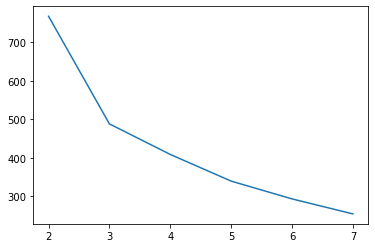

In [425]:
#Import required package

from sklearn.cluster import KMeans

ssd = [] 
range_clusters = [2,3,4,5,6,7] 

#Loop through different values of K clusters

for i in range_clusters:
    
    #Intialize KMeans
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_vars_scaled)
    
    #calculates the sum of square distances of all data points from clusters available and append to a blank list
    ssd.append(kmeans.inertia_) 
                                
# Plot the elbow curve    
plt.plot(range_clusters,ssd) 

After running the elbow curve a few times, 3 clusters seems statistically ideal.

#### 3.2.2  Silhouette Score

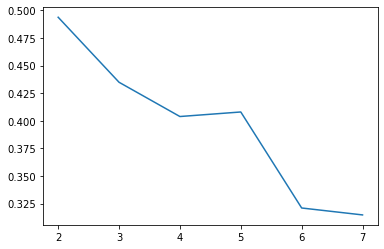

In [426]:
#Import required package

from sklearn.metrics import silhouette_score

silhouette_avg = []

for i in range_clusters:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_vars_scaled)
    
    #Store the cluster labels that are generated from KMeans
    cluster_labels = kmeans.labels_
    
    #Calculate average silhouette score for all data points
    silhouette_avg.append(silhouette_score(df_vars_scaled,cluster_labels))
    
plt.plot(range_clusters,silhouette_avg)

After running the Silhouette Score several times, it seems either 3 or 5 clusters would be ideal.

In real world scenarios, we would consult with the client before deciding the final number of clusters. For this case study,using only the statistical inputs, we will go with 3 clusters.

In [427]:
# Final model with k=3 clusters

kmeans = KMeans(n_clusters = 3,random_state = 100) #Cluster iterations by default is 300
kmeans.fit(df_vars_scaled)

#View the cluster labels
kmeans.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 1,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2])

In [428]:
#Assign cluster labels to the original dataset

df['cluster_labels'] = kmeans.labels_
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200,0


We will now profile the countries basis the cluster labels assigned to them.

#### 3.2.3 Cluster Profiling (k-means)


As per the requirement in the assignment, the profiling will be done basis the following 3 features:-

* **gdpp**: *The GDP per capita. Calculated as the Total GDP divided by the total population.*
* **child_mort**: *Death of children under 5 years of age per 1000 live births*
* **income**: *Net income per person*

We will use boxplots, scatterplots and bar graphs to explore the differences between the clusters.

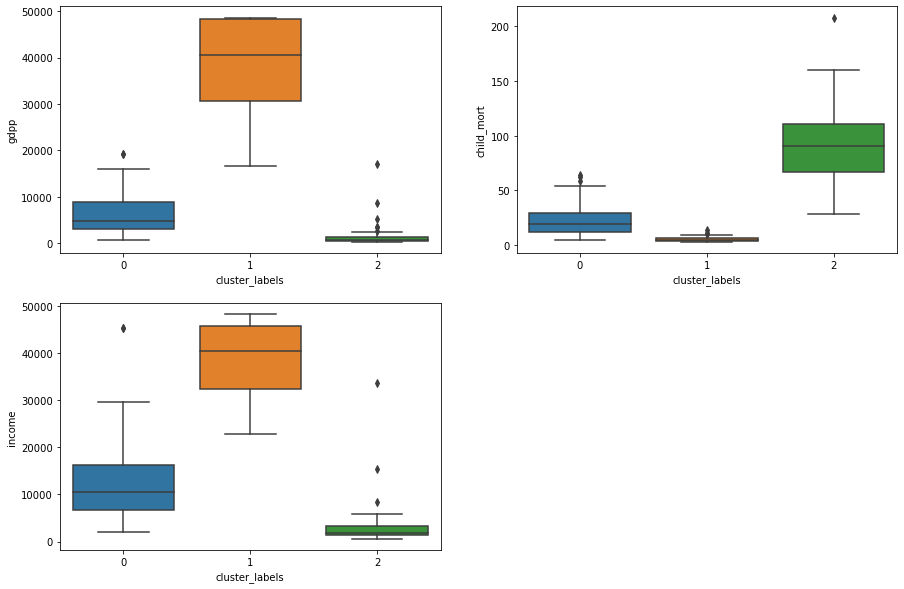

In [429]:
#Boxplots - cluster labels vs gdpp/child_mort/income

profile_vars = ['gdpp','child_mort','income']

plt.figure(figsize = (15,10))
for i in enumerate(profile_vars):
    plt.subplot(2,2,i[0]+1)
    sns.boxplot(x = 'cluster_labels', y = df[i[1]], data = df)

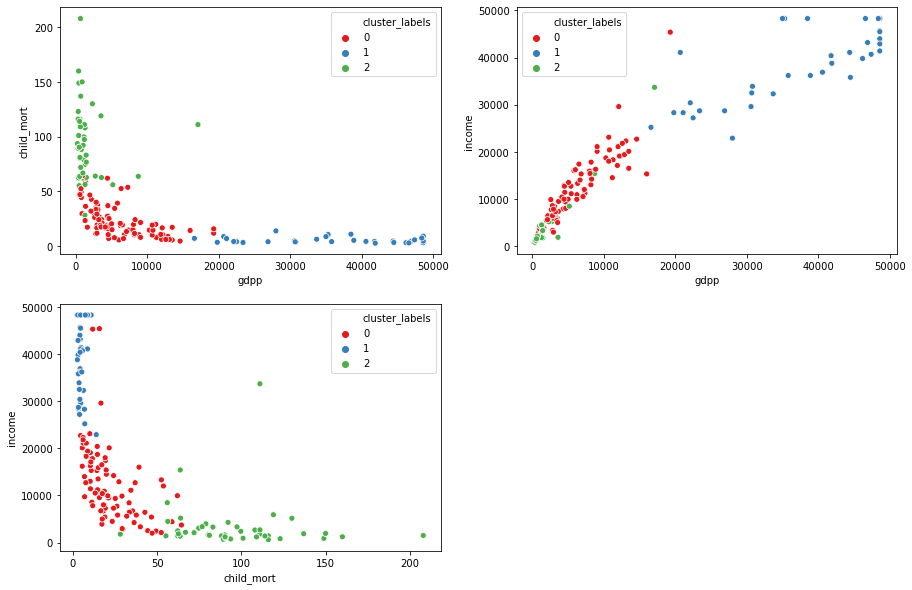

In [430]:
#Scatterplots with 2 features at a time

plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
sns.scatterplot(x = 'gdpp', y = 'child_mort', hue = 'cluster_labels' , data = df, palette = 'Set1' )
plt.subplot(2,2,2)
sns.scatterplot(x = 'gdpp', y = 'income', hue = 'cluster_labels', data = df, palette = 'Set1')
plt.subplot(2,2,3)
sns.scatterplot(x = 'child_mort', y = 'income', hue = 'cluster_labels', data = df, palette = 'Set1')

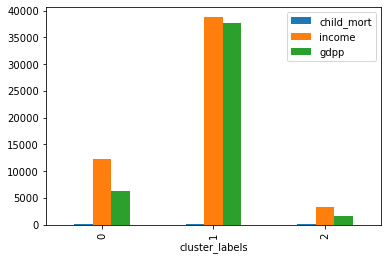

In [431]:
#Bar graphs - cluster labels vs child_mort/income/gdpp

df[['cluster_labels','child_mort','income','gdpp']].groupby('cluster_labels').mean().plot(kind = 'bar')

#### Observations 

From the above visualizations, we could observe that:-

* There are clear differences between the 3 clusters in terms of all 3 variables - GDP, Child Mortality & Income. 
* Countries in cluster 1 have the highest GDP, highest income and the lowest child mortality - all indicating that these are countries that are quite well off in comparison. 
* Cluster 0 countries have GDP that is lesser than any of the Cluster 1 countries. Child mortality is higher and income is lower. However, relatively speaking, Cluster 0 is still a far better performer than Cluster 2.
* Cluster 2 performs poorly across all 3 parameters. While the median of child mortality hovers around 0 per 1000 children for Cluster 1 and about 25 per 1000 for Cluster 0, the same parameter for Cluster 2 hovers around 100 per 1000 which is significantly high just by itself. GDP & Income are very low for Cluster 2 countries as well.

#### Inference

We could interpret this as clustering here conforming to the well known categoriziation of countries in terms of development, namely:-

    * Cluster 1: Developed Countries
    * Cluster 0: Developing Countries
    * Cluster 2: Underdeveloped Countries

Basis all of the above information, we could consider the below 5 countries from Cluster 2 to be most in need of aid.

In [432]:
# Find the 5 countries in CLuster 2 that are in most need of aid by sorting basis gdpp,child_mort & income

df[df['cluster_labels'] == 2].sort_values(by = ['gdpp','child_mort','income'], ascending = [True,False,True]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.26,231,2
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.02,327,2
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.54,334,2
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,7.49,348,2
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.20,399,2


We will now apply the Hiearachical clustering and compare inferences.

### 3.3 Hierarchical Clustering

In [433]:
#Import the required packages

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [434]:
# Checking the numeric variables only dataframe

df_vars_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.669581,-0.629435,-0.732729,-0.958349,0.157336,-1.619092,1.902882,-0.757362
1,-0.538949,-0.542172,-0.473489,-0.472182,-0.394006,-0.312347,0.647866,-0.859973,-0.523321
2,-0.272833,-0.475838,-0.530017,-0.560152,-0.192552,0.789274,0.670423,-0.038404,-0.498838
3,2.007808,-0.418960,-0.588935,-0.543087,-0.667360,1.387054,-1.179234,2.128151,-0.560376
4,-0.695634,-0.027134,-0.150685,0.306422,0.227992,-0.601749,0.704258,-0.541946,0.013312


#### 3.3.1 Hierarchical Clustering - Single Linkage

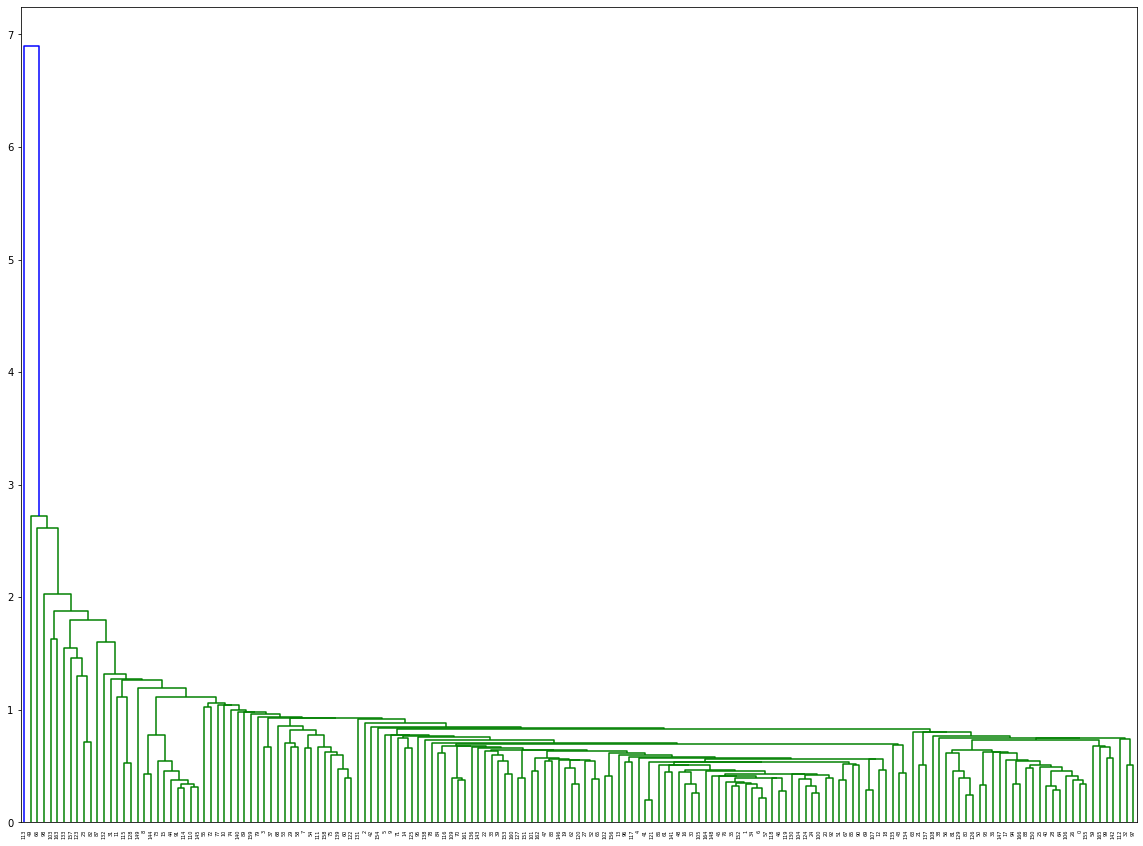

In [435]:
# Initialize hierarchical clustering with single linkage
df_single = linkage(df_vars_scaled,method = 'single', metric = 'euclidean')

#Plot dendrogram
plt.figure(figsize = (20,15))
dendrogram(df_single)
plt.show()

As we can see, single linkage isnt suited for this particular dataset when calculating clusters. We will therefore proceed with using Complete Linkage as the method of measure between clusters.

#### 3.3.2 Hierarchical Clustering - Complete Linkage

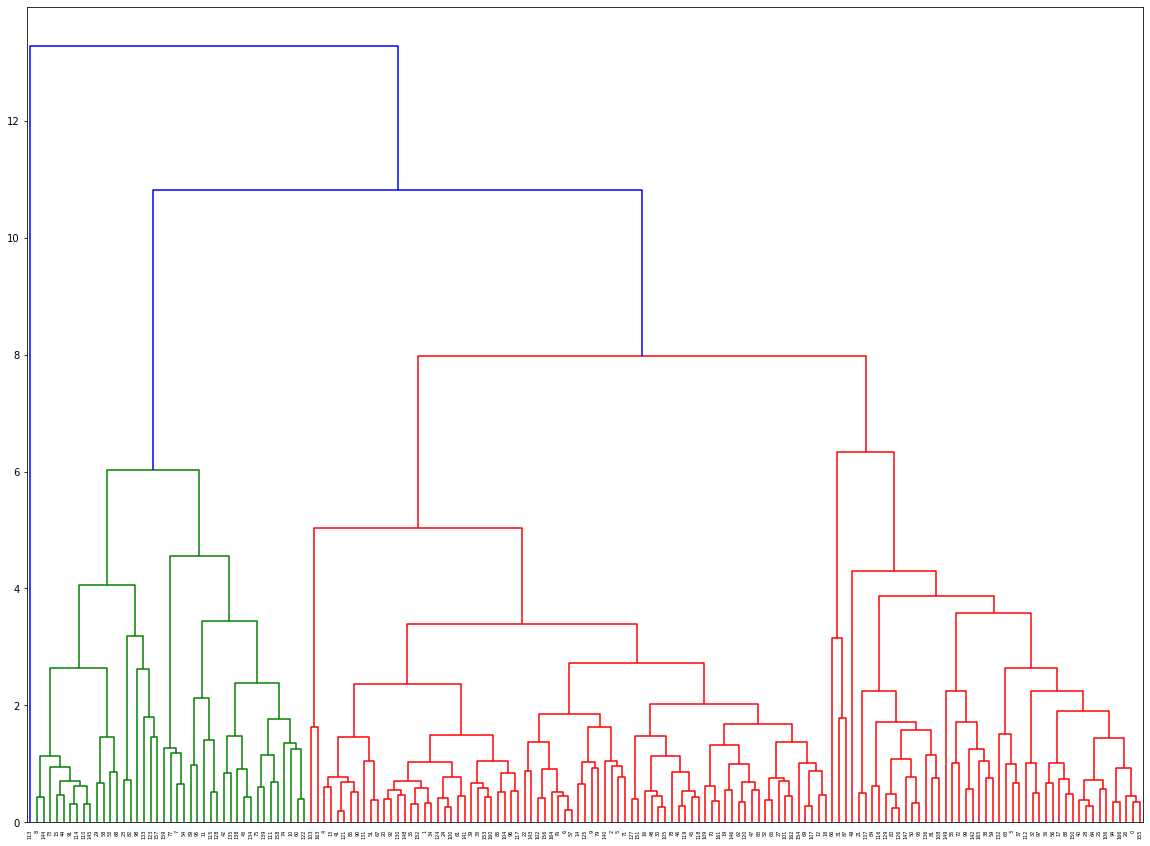

In [436]:
df_complete = linkage(df_vars_scaled,method = 'complete', metric = 'euclidean')
plt.figure(figsize = (20,15))
dendrogram(df_complete)
plt.show()

This is a much more intepretable dendrogram and the differences in clusters are clear. We will use the cut tree method now to choose the number of clusters we require. Again, the decision made here is usually driven by inputs from the client but for this case study, we will go with 5 clusters as the diagram indicates enough differences between them.

In [437]:
#Use cut tree to arrive at 5 clusters

cluster_id = cut_tree(df_complete,n_clusters = 5).reshape(-1,)
cluster_id

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 3, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       3, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 3,
       0, 2, 1, 2, 1, 0, 0, 2, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 4, 2, 2, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 0, 1, 1,
       0, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [438]:
#Add the cluster_id column to the original dataset

df['cluster_id'] = cluster_id
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553,2,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090,0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460,0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530,2,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200,0,1


#### 3.3.3 Cluster Profiling (Hierarchical Clustering)

We will once again profile the clusters based on the following features using boxplots, scatterplots & bar graphs:-

* gdpp
* child_mort
* income

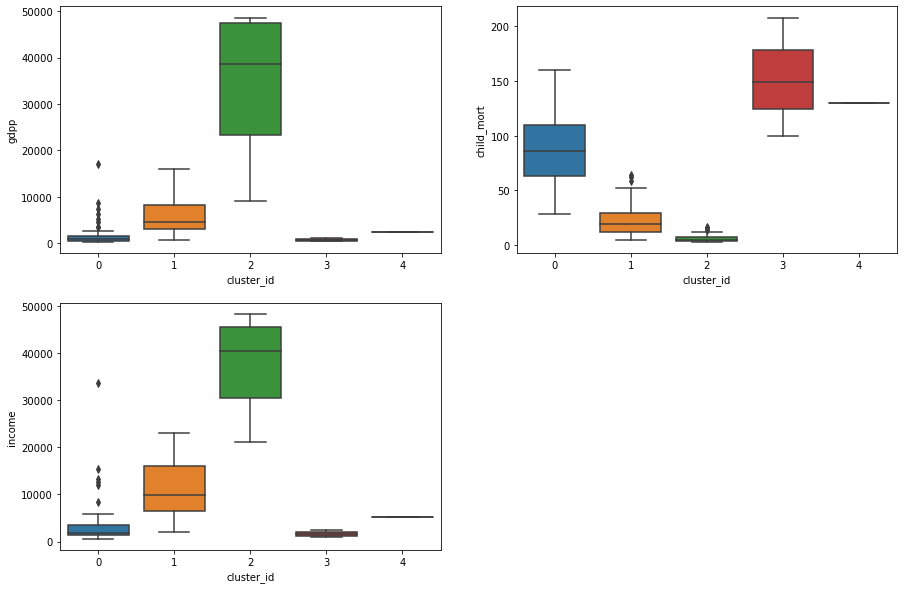

In [439]:
#Boxplots - cluster IDs vs gdpp/child_mort/income

profile_vars = ['gdpp','child_mort','income']

plt.figure(figsize = (15,10))
for i in enumerate(profile_vars):
    plt.subplot(2,2,i[0]+1)
    sns.boxplot(x = 'cluster_id', y = df[i[1]], data = df)

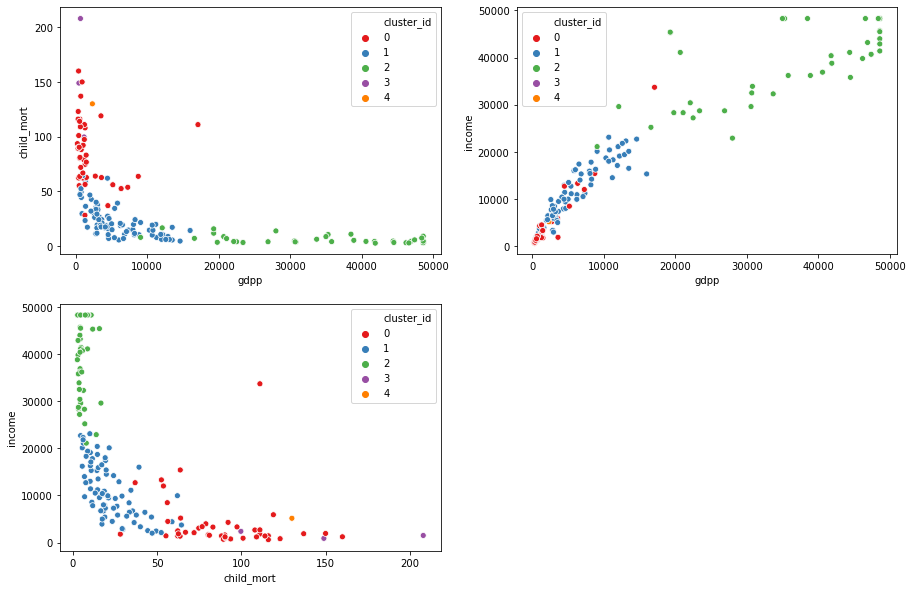

In [440]:
#Scatterplots with 2 features at a time

plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
sns.scatterplot(x = 'gdpp', y = 'child_mort', hue = 'cluster_id' , data = df, palette = 'Set1' )
plt.subplot(2,2,2)
sns.scatterplot(x = 'gdpp', y = 'income', hue = 'cluster_id', data = df, palette = 'Set1')
plt.subplot(2,2,3)
sns.scatterplot(x = 'child_mort', y = 'income', hue = 'cluster_id', data = df, palette = 'Set1')

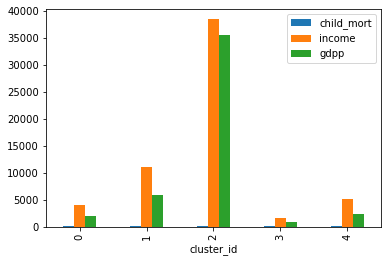

In [441]:
#Bar graphs - cluster IDs vs child_mort/income/gdpp

df[['cluster_id','child_mort','income','gdpp']].groupby('cluster_id').mean().plot(kind = 'bar')

#### Observations

From the above clustering process and visualizations, we could observe that:-

* There are 4 main clusters in terms of the 3 important variables - GDP, Child Mortality & Income. The 5th one -  namely Cluster 4 - has only one country: Nigeria that does not seem to fit into other clusters. 
* Hiearchical Clustering tells us a slightly different story compared to K-Means. The differences in the 3 variables across all clusters are relatively smaller. This tells us that not all countries necessarily fit into the the developed vs developing vs underdeveloped narrative.
* Similar to what was observed in K-Means clustering, there is one cluster that is poorly performing across all 3 variables: Cluster 3.

#### Inference

* The traditional defintions of development and resources that we are used to do not seem to apply here. 
* Referring to external sources, research  by Hans Rosling (Gapminder Foundation - https://www.gapminder.org/topics/four-income-levels/) shows that the modern world has moved on from fitting into the developed vs developing vs underdeveloped countries narrative. We are now in a world with '4 levels' defined basis several factors such as income, lifespan, GDP, child mortality etc.


Based on the above observations and inference, we could consider the below 5 countries from Cluster 3 and Cluster 0 (as Cluster 3 has only 3 countries and Cluster 0 follows in terms of poor performance across key features), sorted by gdpp, child_mort & income, to be the ones that get the aid.

In [442]:
# Three countries in CLuster 3 that are in most need of aid by sorting basis gdpp,child_mort & income

df[df['cluster_id'] == 3].sort_values(by = ['gdpp','child_mort','income'], ascending = [True,False,True]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels,cluster_id
31,Central African Republic,149.0,52.628,17.7508,118.190,888.0,2.01,47.5,5.21,446,2,3
66,Haiti,208.0,101.286,45.7442,428.314,1500.0,5.45,32.1,3.33,662,2,3
87,Lesotho,99.7,460.980,129.8700,1181.700,2380.0,4.15,46.5,3.30,1170,2,3


In [443]:
# Remaining two countries from CLuster 0 that are in most need of aid by sorting basis gdpp,child_mort & income

df[df['cluster_id'] == 0].sort_values(by = ['gdpp','child_mort','income'], ascending = [True,False,True]).head(2)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels,cluster_id
26,Burundi,93.6,20.6052,26.796,90.552,764.0,12.30,57.7,6.26,231,2,0
88,Liberia,89.3,62.4570,38.586,302.802,700.0,5.47,60.8,5.02,327,2,0


## Conclusion

Comparing the observations and inferences arrived at using the 2 clustering methods and also keeping in mind that this case study does not have active business inputs, we will go with the results from the Hierarchical Clustering. The two primary reasons for this decision are:-

* Hierarchical Clustering is known to be more accurate than K Means Clustering.
* The results from the Hierarchical Clustering conforms to the external research which points us away from the **Developed vs Developing vs Underdeveloped** countries narrative to the more recent **Level 1 to 4** categorization of countries (basis external research as previously mentioned).

In conclusion, in the order of the highest need, *the final list of five countries* we have arrived at that require aid are:-

* Central African Republic
* Haiti
* Lesotho
* Burundi
* Liberia